purpose: to look at MAGMA S2G mapping for rats

# set-up

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.multitest
import statsmodels.api as sm 
import pylab as py 
import statsmodels.api as sm

In [8]:
os.chdir('/tscc/projects/ps-palmer/brittany/rare_common_alcohol/rare_common_alcohol_comparison/notebooks/')

In [9]:
from rca_functions import manhattan

In [10]:
os.chdir('/tscc/projects/ps-palmer/brittany/SUD_cross_species/')

In [5]:
cigday=pd.read_csv('nicsa_magma/cigday_pc1_nicsa_geno.genes.out',delim_whitespace=True,index_col=None,skiprows=1)
smkinit=pd.read_csv('nicsa_magma/smkinit_pc1_nicsa_geno.genes.out',delim_whitespace=True,index_col=None,skiprows=1)

In [25]:
IBM=['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000']
colour_dict={
    'smkinit':IBM[1],
    'smkinit_alt':IBM[0],
    'cigday':IBM[4],
    'cigday_alt':IBM[3],
    'loco':IBM[2],
    'loco_alt':'#930741'
}

In [14]:
def qqplot_gwas(pvals):

    # Calculate theoretical p-values
    n = len(pvals)
    expected = -np.log10((np.arange(1, n + 1) / (n + 1)))
    
    # Sort the observed p-values
    observed = -np.log10(np.sort(pvals))

    # Create the Q-Q plot
    plt.figure(figsize=(8, 8))
    plt.plot(expected, observed, 'o', label='Observed p-values')
    plt.plot([0, max(expected)], [0, max(expected)], 'k-', label='Expected (null)')

    plt.show()

# Example usage
# qqplot_gwas(pvals, qtltable, col2use, tnum, d, save=True, path='/your/path/')


# NICSA - PC1

## plot stats

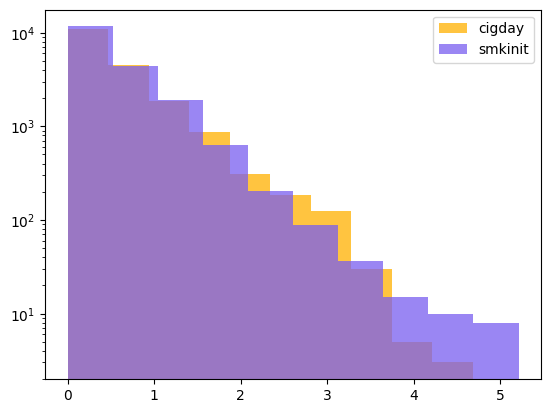

In [7]:
plt.hist(-np.log10(cigday.P), bins=None,histtype='stepfilled',density=False, rwidth=0.,color=colour_dict['cigday'], label='cigday',alpha=0.75)
plt.hist(-np.log10(smkinit.P), bins=None, histtype='stepfilled',density=False, rwidth=0.8,color=colour_dict['smkinit'], label='smkinit',alpha=0.75)
plt.yscale('log')
plt.legend()

In [8]:
cigday['FDR']=statsmodels.stats.multitest.fdrcorrection(cigday['P'],alpha=0.05,method='indep',is_sorted=False)[1]
smkinit['FDR']=statsmodels.stats.multitest.fdrcorrection(smkinit['P'],alpha=0.05,method='indep',is_sorted=False)[1]

In [9]:
cigday[cigday['FDR']<0.2]

,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,P,FDR
2735,Adgrv1,2,11321434,11921713,688,1,2018,3.4581,0.000272,0.178566
2736,Lysmd3,2,11923787,11949944,27,1,2018,3.3619,0.000387,0.178566
2737,Polr3g,2,11935215,11996125,88,1,2018,3.6787,0.000117,0.178566
2738,Mblac2,2,11976075,12038882,29,1,2018,3.7954,0.000074,0.178566
2739,Cetn3,2,12079025,12111828,61,3,2018,3.2257,0.000628,0.178566
...,...,...,...,...,...,...,...,...,...,...
13316,Atp5pd,10,100647700,100672960,18,2,2018,2.8667,0.002074,0.198305
14676,Marco,13,31606278,31658521,248,1,2018,2.9080,0.001819,0.188465
15354,Cxcl13,14,13598894,13623965,93,9,2018,3.0480,0.001152,0.178566
15474,Adgrl3,14,26326320,27114060,1779,10,2018,3.2113,0.000661,0.178566


In [15]:
cutoff=0

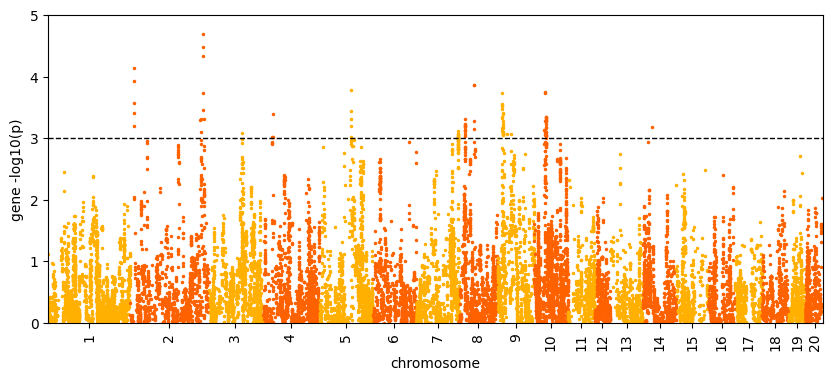

In [11]:
fig=plt.figure(figsize=(10,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=cigday['P'],pos=cigday['START'],chr=cigday['CHR'],label='',
                    cut=0,lines=[cutoff],lines_colors=['black'], colors=[colour_dict['cigday'], colour_dict['cigday_alt']],
                    lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('gene -log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')

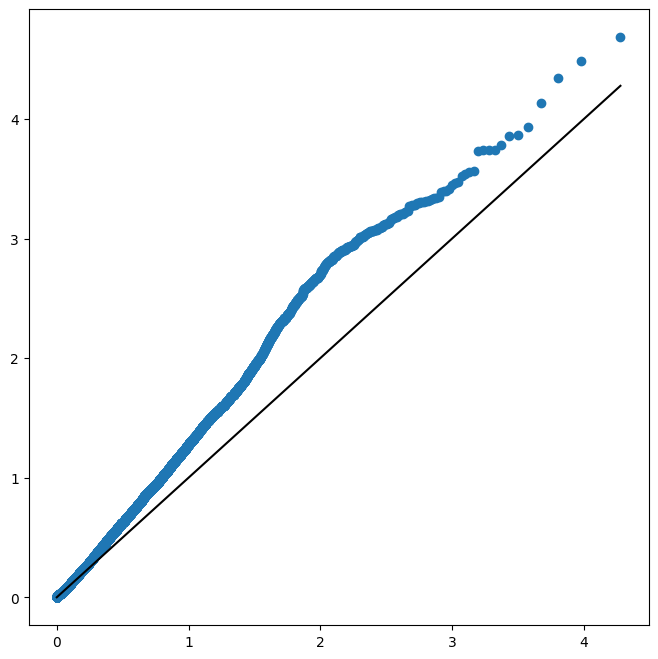

In [18]:
qqplot_gwas(cigday['P'])

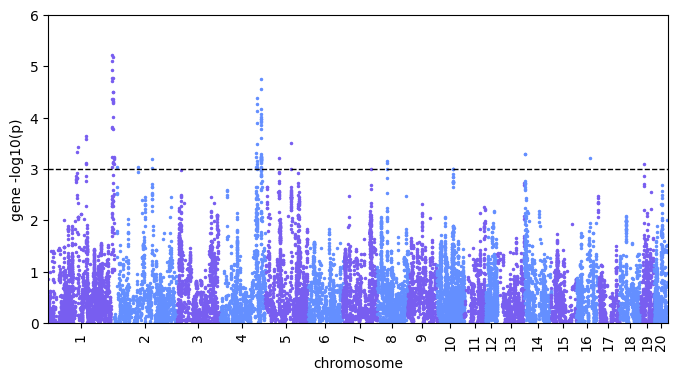

In [13]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=smkinit['P'],pos=smkinit['START'],chr=smkinit['CHR'],label='',
                    cut=0,lines=[cutoff],lines_colors=['black'], colors=[colour_dict['smkinit'], colour_dict['smkinit_alt']],
                    lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('gene -log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')

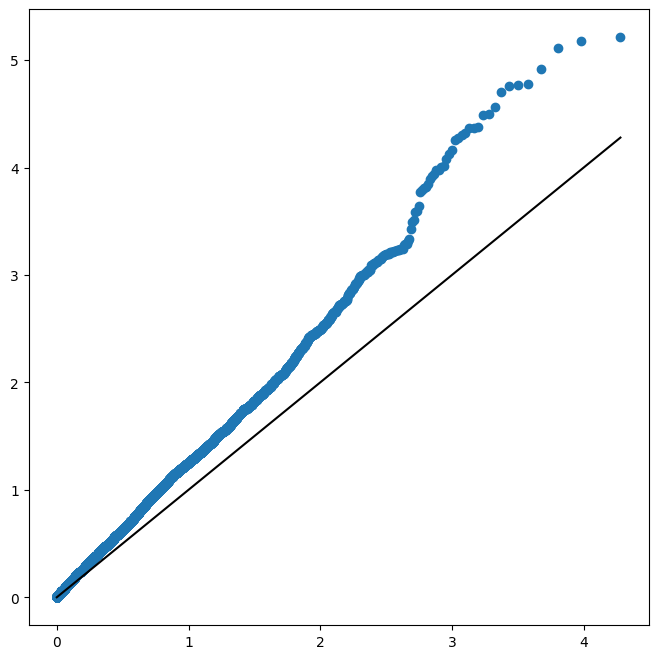

In [15]:
qqplot_gwas(smkinit['P'])

# LOCO

In [13]:
loco_snp=pd.read_csv('regressedlr_combined_locomotor.mlma', sep='\t')

In [14]:
loco_snp

,Chr,SNP,bp,A1,A2,Freq,b,se,p
0,1,1:1113500,1113500,T,A,0.926542,-0.050935,0.032059,0.112111
1,1,1:1124362,1124362,G,A,0.927104,-0.050403,0.032101,0.116389
2,1,1:1169549,1169549,G,T,0.930027,-0.066158,0.032631,0.042616
3,1,1:1175836,1175836,G,A,0.930205,-0.061351,0.032677,0.060449
4,1,1:1181278,1181278,C,T,0.930561,-0.063303,0.032737,0.053150
...,...,...,...,...,...,...,...,...,...
5315006,20,20:54428480,54428480,A,T,0.019258,-0.059840,0.060062,0.319101
5315007,20,20:54428485,54428485,A,G,0.019258,-0.059840,0.060062,0.319101
5315008,20,20:54428858,54428858,A,C,0.019258,-0.059840,0.060062,0.319101
5315009,20,20:54429269,54429269,A,G,0.980738,0.059628,0.060061,0.320816


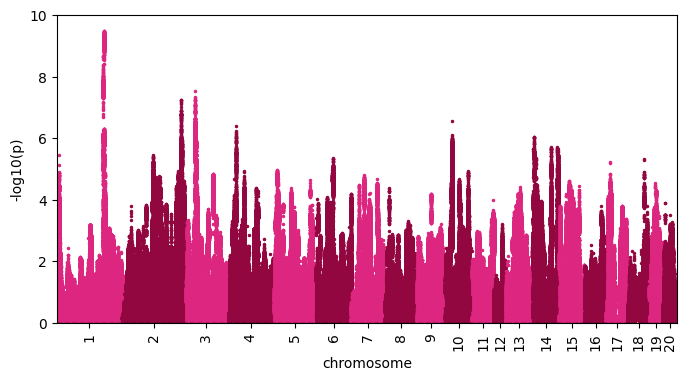

In [27]:
fig=plt.figure(figsize=(8,4))
#fig, ax=plt.subplots(figsize=(10,4))
manhattan(pval=loco_snp['p'],pos=loco_snp['bp'],chr=loco_snp['Chr'],label='',
                    cut=0,lines=[cutoff],lines_colors=['black'], colors=[colour_dict['loco'], colour_dict['loco_alt']],
                    lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
fig=plt.title('')
fig=plt.ylabel('-log10(p)')
plt.margins(x=0)
#commented out- use to turn into miami plot
#plt.gca().invert_yaxis()
#plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
fig=plt.xticks(rotation='vertical')

In [47]:
win=[0,1,5,10,25,50]
loco={}
for x in win:    
    loco[x]=pd.read_csv('magma/loco_meta_win'+str(x)+'.genes.out', delim_whitespace=True,index_col=None,skiprows=1)

In [48]:
loco[0]

,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,P
0,Vom2r5,1,1161906,1170559,1,1,8679,1.72110,0.042616
1,Vom2r6,1,1214035,1222755,1,1,8679,1.80390,0.035621
2,LOC120098769,1,1964049,1968983,5,1,8679,-0.38291,0.649100
3,Raet1d,1,2001596,2007039,9,1,8679,-0.21683,0.585830
4,LOC100910848,1,2032224,2048178,56,3,8679,-0.47262,0.681760
...,...,...,...,...,...,...,...,...,...
17558,Ascc3,20,53510137,53795446,293,1,8679,0.45060,0.326140
17559,Sim1,20,53827601,53907219,128,1,8679,0.47503,0.317380
17560,LOC103694460,20,54414724,54418200,8,1,8679,0.45884,0.323170
17561,Cd99,20,54418239,54422882,16,1,8679,0.45049,0.326180


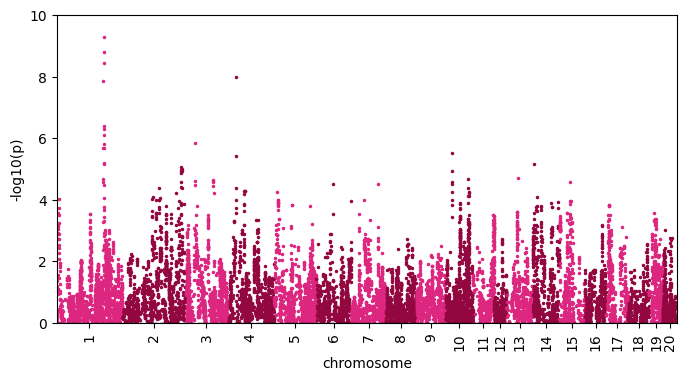

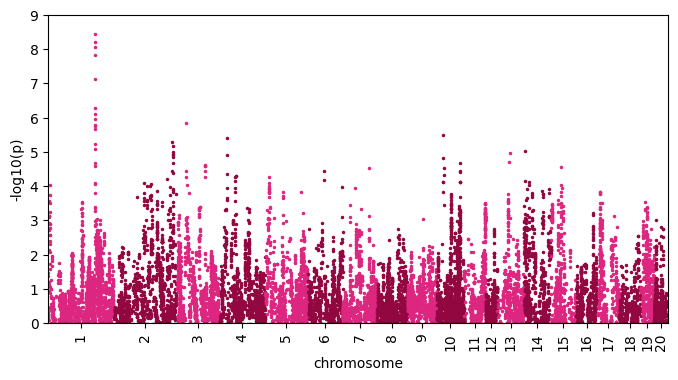

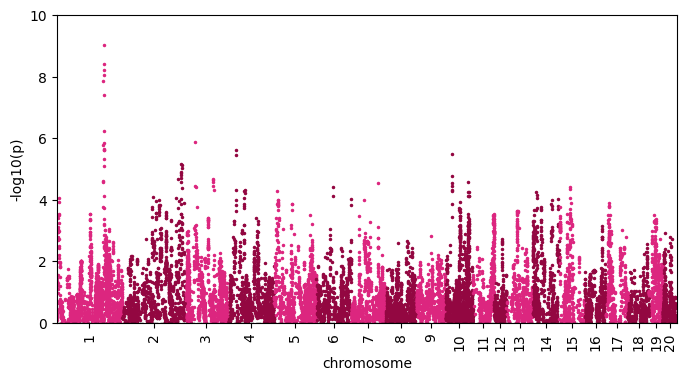

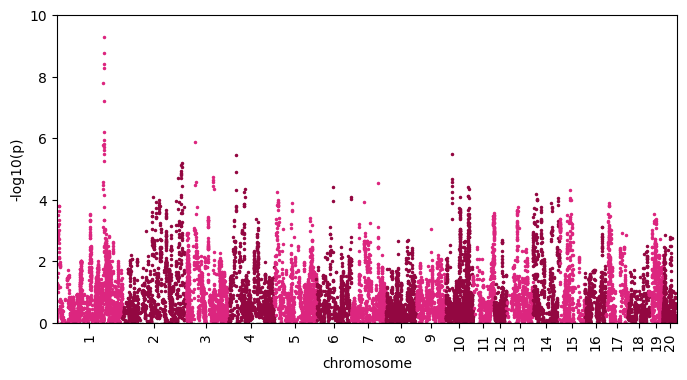

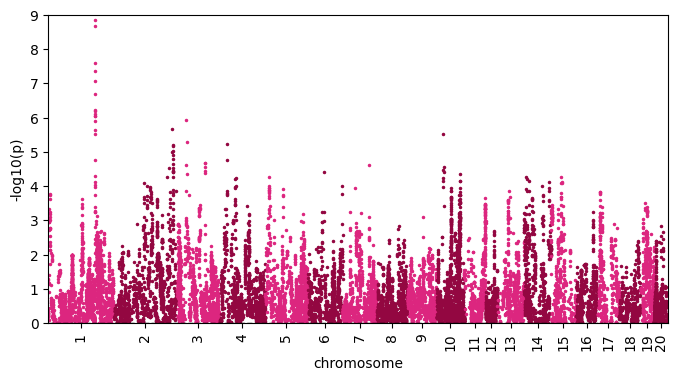

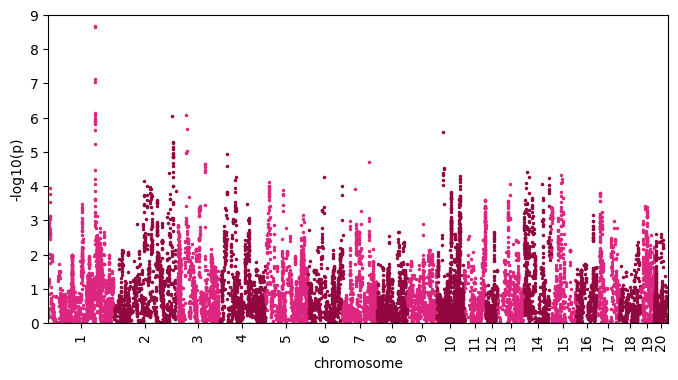

In [49]:
for x in win:
    fig=plt.figure(figsize=(8,4))
    #fig, ax=plt.subplots(figsize=(10,4))
    manhattan(pval=loco[x]['P'],pos=loco[x]['START'],chr=loco[x]['CHR'],label='',
                        cut=0,lines=[cutoff],lines_colors=['black'], colors=[colour_dict['loco'], colour_dict['loco_alt']],
                        lines_widths = [1], lines_styles = ["--"], markersize=3, plot_grid_lines=False)
    fig=plt.title('')
    fig=plt.ylabel('-log10(p)')
    plt.margins(x=0)
    #commented out- use to turn into miami plot
    #plt.gca().invert_yaxis()
    #plt.tick_params(axis='x',labeltop=True, top=True, bottom=False, labelbottom=False)
    fig=plt.xticks(rotation='vertical')

In [54]:
loco

,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,P
0,Vom2r5,1,1160906,1171559,1,1,8679,1.72110,0.042616
1,Vom2r6,1,1213035,1223755,1,1,8679,1.80390,0.035621
2,LOC120098769,1,1963049,1969983,5,1,8679,-0.38291,0.649100
3,Raet1d,1,2000596,2008039,9,1,8679,-0.21683,0.585830
4,LOC100910848,1,2031224,2049178,62,3,8679,-0.48011,0.684420
...,...,...,...,...,...,...,...,...,...
18368,Ascc3,20,53509137,53796446,300,1,8679,0.44950,0.326530
18369,Sim1,20,53826601,53908219,131,1,8679,0.47495,0.317410
18370,LOC103694460,20,54413724,54419200,13,1,8679,0.43975,0.330060
18371,Cd99,20,54417239,54423882,21,1,8679,0.44123,0.329520


In [64]:
t=loco[0][loco[0]['P']<0.05]
t=t.reset_index()

In [65]:
t

,index,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,P
0,0,Vom2r5,1,1161906,1170559,1,1,8679,1.7211,0.042616
1,1,Vom2r6,1,1214035,1222755,1,1,8679,1.8039,0.035621
2,19,Adgb,1,4753621,4896268,480,10,8679,2.8947,0.001897
3,20,Rab32,1,4946193,4961003,85,4,8679,3.1212,0.000901
4,21,Grm1,1,5058285,5453170,1047,10,8679,3.0461,0.001159
...,...,...,...,...,...,...,...,...,...,...
3325,17486,Mcm9,20,32818219,32929577,261,6,8679,2.4065,0.008053
3326,17487,Asf1a,20,32893962,32908808,64,3,8679,2.3374,0.009709
3327,17488,LOC120098939,20,32894143,32894801,4,1,8679,2.8719,0.002040
3328,17489,Fam184a,20,32934424,33056626,281,7,8679,2.7305,0.003162


## run correlation for variants

In [66]:
t=loco[0][loco[0][loco[0]['P']<0.05]]
fig, ax = plt.subplots(figsize=(15, 2))

ax.plot(t['GENE'], t['P'])
  

ValueError: Boolean array expected for the condition, not object

In [ ]:
def NPS_lineplot(df,metric, filename, xrange=None, yrange=None, savefig=False, sigline=False):
    matplotlib.rcParams.update({'font.size': 8})
    df['-log10(p)']=-np.log10(df['empirical_p'])

    # Group data by NPS_single and plot each group separately
    groups = df.groupby('NPS_single')
    
    # Initialize a plot
    fig, ax = plt.subplots(figsize=(2.75, 2))
    
    # Plot lines for each NPS_single group
    for name, group in groups:
        ax.plot(group['NPS_common-rare'], group[metric], marker='o', label=f'NPS_single={name}')
    if sigline:
	    ax.axhline(y =-np.log10(0.05/len(df)), color = 'red', linestyle = 'dashed', linewidth=1)
    if ~(yrange is None):
        ax.set_ylim(yrange)
    if ~(xrange is None):
        ax.set_xlim(xrange)    
    # Set plot labels
    ax.set_xlabel('NPS combined') 
    ax.set_ylabel(metric.replace('_',' '))
    ax.legend(title='NPS single')
    ax.grid(True)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if savefig:
        plt.savefig('figures/'+filename,bbox_inches='tight')
    plt.show()

# Porcupine functions

In [ ]:
def porcupine(pval, test, pos, chr, label,
              cut_SKAT=5e-8,
              cut_SKATO=5e-8,
              cut_burden=5e-8,
              chrs_plot=None, chrs_names=None,
              cut=2,
              colors=['k', '0.5'],
              title='Title',
              xlabel='chromosome',
              ylabel='-log10(p-value)',
              top=0,
              lines=[10, 15],
              lines_colors=['g', 'r'],
              lines_styles=['-', '--'],
              lines_widths=[1, 1],
              zoom=None,
              scaling='-log10',
              plot_grid_lines=True,
              **kwargs):
    """
    Generates a specialized Porcupine plot for different types of rare-variant SNP to gene tests (SKAT, SKATO, Burden), highlighting significant findings in genomic data using color-coding for test types.

    Parameters:
    - pval (array-like): Array of p-values for genomic variants.
    - test (array-like): Array specifying the type of genetic test performed for each variant p-value.
    - pos (array-like): Array of positions of variants on their respective chromosomes.
    - chr (array-like): Array of chromosome numbers for each variant.
    - label (str): Label for the dataset, used for annotations.
    - cut_SKAT, cut_SKATO, cut_burden (float): Cutoff p-values for SKAT, SKATO, and Burden tests, respectively.
    - chrs_plot (list, optional): Specific chromosomes to include in the plot.
    - chrs_names (list, optional): Custom names for the chromosomes to be plotted.
    - cut (float): Cutoff for -log10(p-value) for displaying points on the plot.
    - colors (list): Colors to use for plotting points, cycling through for different chromosomes.
    - title (str): Title of the plot.
    - xlabel, ylabel (str): Labels for the x-axis and y-axis.
    - top (float): Upper limit for the y-axis; if 0, it is calculated from the data.
    - lines (list): y-values where horizontal lines should be drawn.
    - lines_colors, lines_styles, lines_widths (list): Properties for the horizontal lines.
    - zoom (tuple): Tuple (chromosome, center position, range) for focusing on a specific region.
    - scaling (str): P-value scaling method; supports '-log10' for negative log transformation or 'none'.
    - plot_grid_lines (bool): Whether to include grid lines on the plot.
    - **kwargs: Additional keyword arguments for matplotlib plot functions.

    Returns:
    matplotlib.pyplot: Configured plot object ready for display or saving.
    """
    
    # Initialize plot settings and clear any existing figures
    shift = np.array([0.0])
    plt.clf()

    # Determine which chromosomes to plot, sorting naturally if needed
    if chrs_plot is None:
        chrs_list = np.unique(chr)
        chrs_list = sorted_nicely(chrs_list) if isinstance(chrs_list[0], str) else chrs_list.sort()
    else:
        chrs_list = chrs_plot

    # Generate chromosome labels if not provided
    if chrs_names is None:
        chrs_names = [str(chrs_list[i]) for i in range(len(chrs_list))]

    plot_positions = len(chrs_list) == 1

    # Convert cutoffs to the appropriate scale if necessary
    if scaling == '-log10':
        cut_burden = -np.log10(cut_burden)
        cut_SKATO = -np.log10(cut_SKATO)
        cut_SKAT = -np.log10(cut_SKAT)
        
    # Plot data for each chromosome
    for ii, i in enumerate(chrs_list):     
        plt.subplot(1,1,1)
        filt = np.where(chr == i)[0]
        x = shift[-1] + pos[filt]
        y = -np.log10(pval[filt]) if scaling == '-log10' else pval[filt]
        test_filter = test[filt]
        
        # Plot data points above a general cut-off, with specific colors for each test type. Requires the color_dict to function, or must redefine the color dictionary
        plt.plot(x[y > cut], y[y > cut], '.', color=colors[ii % len(colors)], **kwargs)
        plt.plot(x[(y > cut) & (test_filter == 'Burden') & (y > cut_burden)], y[(y > cut) & (test_filter == 'Burden') & (y > cut_burden)], '.', color=color_dict['Burden'], **kwargs)
        plt.plot(x[(y > cut) & (test_filter == 'SKATO') & (y > cut_SKATO)], y[(y > cut) & (test_filter == 'SKATO') & (y > cut_SKATO)], '.', color=color_dict['SKAT-O'], **kwargs)
        plt.plot(x[(y > cut) & (test_filter == 'SKAT') & (y > cut_SKAT)], y[(y > cut) & (test_filter == 'SKAT') & (y > cut_SKAT)], '.', color=color_dict['SKAT'], **kwargs)

        # Calculate the maximum shift for the next set of points
        shift_f = np.max(x)
        shift_m = 0  # Placeholder for potential future use
        shift = np.append(shift, np.max([shift_f, shift_m]))

        # Set grid lines and limits
        if plot_grid_lines:
            plt.plot([shift[-1], shift[-1]], [0, 1000], '-', lw=0.5, color='lightgray', **kwargs)
        plt.xlim([0, shift[-1]])

    # Determine the upper limit for the y-axis
    if top == 0:
        top = np.ceil(np.max(-np.log10(pval))) if scaling == '-log10' else np.ceil(np.max(pval))

    # Configure fig labels and horizontal lines
    shift_label = shift[-1]
    shift = (shift[1:] + shift[:-1]) / 2
    for i, line_height in enumerate(lines):
        plt.axhline(y=line_height, color=lines_colors[i], linestyle=lines_styles[i], linewidth=lines_widths[i])
    
    plt.ylim([cut, top])
    plt.title(title)
    if not plot_positions:
        plt.xticks(shift, chrs_names)
    plt.text(shift_label * 0.95, top * 0.95, label, verticalalignment='top', horizontalalignment='right')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    # Apply zoom settings if specified
    if zoom is not None:
        plt.xlim([zoom_shift - zoom[2], zoom_shift + zoom[2]])

    return plt

In [ ]:
def porcupineplot(self, qtltable: pd.DataFrame(), traitlist: list = [], run_only_qtls = True,
                save_fmt: list = ['html', 'png'], display: bool = True,
                  low_mem = False, childlock = True, qtl_annotation: bool = True, nosmallp: bool = True):
    printwithlog(f'starting porcupineplot ... {self.project_name} reading files')
    samplen = int(1e5) if low_mem else int(5e5) 
    rangen = range(160,180) if low_mem else range(80,90)
    maxtraits = 10
    if len(traitlist) == 0: 
        if run_only_qtls: traitlist = list(qtltable.trait.unique())
        else: traitlist = self.traits
    traitlist = [x.replace("regressedlr_", "") for x in traitlist]
    qtl = qtltable.query('QTL==True')
    df_gwas,df_date = [], []
    for trait_pos, t in tqdm(list(enumerate(traitlist))):
        if childlock == True: childlock_val = np.inf if trait_pos < maxtraits else 0
        for opt in [f'regressedlr_{t.replace("regressedlr_", "")}.loco.mlma', 
                    f'regressedlr_{t.replace("regressedlr_", "")}.mlma']+ \
        [f'regressedlr_{t.replace("regressedlr_", "")}_chrgwas{chromp2}.mlma' for chromp2 in self.chrList()]:
            if glob(f'{self.path}results/gwas/{opt}'): 
                samplenuse = samplen//20 if '_chrgwas' in opt else samplen
                g = pd.read_csv(f'{self.path}results/gwas/{opt}', sep = '\t', dtype = {'Chr': int, 'bp': int}).assign(trait = t)
                g['p'] = g['p'].fillna(1)
                #g=g.applymap(np.nan_to_num)
                g['inv_prob'] = 1/(np.clip(g.p, 1e-6, 1)) 
                if not nosmallp:
                    if  g.query('p > 0.05').shape[0] > 0:
                        gweighted = [g.query('p > 0.05').sample(min(samplenuse, g.query('p > 0.05').shape[0], childlock_val), weights='inv_prob')]
                    else: gweighted = []
                    gweighted += [g[::np.random.choice(rangen)].sample(frac = (trait_pos< maxtraits))]
                else: gweighted =[]
                g = pd.concat([g.query('p < 0.05')]+ gweighted )\
                .sort_values(['Chr', 'bp']).reset_index(drop = True).dropna()
                df_gwas += [g]
                if sum(map(len, df_gwas)) > 1e6: maxtraits = 0
            else: pass
    df_gwas = pd.concat(df_gwas).sort_values(['Chr', 'bp']).reset_index(drop = True)
    
    append_position = df_gwas.groupby('Chr').bp.agg('max').sort_index().cumsum().shift(1,fill_value=0)
    df_gwas['Chromosome'] = df_gwas.apply(lambda row: row.bp + append_position[row.Chr], axis = 1)
    cmap = sns.color_palette("tab10", len(traitlist))
    d = {t: cmap[v] for v,t in enumerate(sorted(traitlist))}
    tnum = {t:num for num,t in enumerate(sorted(traitlist))}
    def mapcolor(c, thresh, p, trait):
        if -np.log10(p)> thresh : return d[trait] 
        elif int(str(c).replace('X',str(self.n_autosome+1)).replace('Y', str(self.n_autosome+2)).replace('MT', str(self.n_autosome+4)))%2 == 0: return 'black'
        return 'gray'
    
    printwithlog(f'starting porcupineplot ... {self.project_name} colorcoding')
    df_gwas['color']= df_gwas.progress_apply(lambda row: mapcolor(row.Chr, self.threshold, row.p, row.trait) ,axis =1)
    df_gwas['annotate'] = (df_gwas.SNP + df_gwas.trait.str.replace('regressedlr_', '') ) .isin(qtl.reset_index().SNP+qtl.reset_index().trait.str.replace('regressedlr_', ''))
    df_gwas.trait = df_gwas.trait.str.replace('regressedlr_', '')
    df_gwas['log10p'] = -np.log10(df_gwas['p'])
    
    fig2 =  go.Figure(data=[])
    fig2.add_scattergl(x = df_gwas['Chromosome'].values,y = -np.log10(df_gwas['p']), name = '', 
                       mode='markers', marker=dict(color=df_gwas.color,line_width=0), showlegend = False)
    for name, ite in tqdm(df_gwas.query('annotate').sort_values('trait').groupby('trait')):
        fig2.add_scattergl(x = ite.Chromosome,y = -np.log10(ite.p),mode='markers',name = f"{name} ({tnum[name]+1})",
                       marker=dict( line_width=1, size = 15, color ='rgb({},{},{})'.format(*ite.color.iloc[0]) ),
                       marker_symbol = 'star-diamond-dot')
    for x in append_position.values: fig2.add_vline(x=x, line_width=1, line_dash="dash", line_color="gray")
    fig2.add_hline(y=self.threshold, line_width=2,  line_color="red")
    fig2.add_hline(y=self.threshold05, line_width=2, line_color="blue")
    if qtl_annotation: 
        showlegend = True
        df_gwas.query('annotate')\
               .apply(lambda x: fig2.add_annotation(x=x.Chromosome, y=-np.log10(x.p),
                                                    text=f"({tnum[x.trait]+1})",showarrow=True,arrowhead=2), axis = 1)
    else:showlegend = True
    if nosmallp:
        # printwithlog('adding lines to porcupineplot')
        temp = df_gwas.query('log10p < 2')
        def add_loli(row):
            return  dict(type = 'line', x0 = row.Chromosome, x1 = row.Chromosome, y0 = 0, y1 =1.32 , line = {'color': row.color, "width": 7, 'dash': 'solid'})
        temp['shapes'] = temp.progress_apply(add_loli, axis = 1)
        temp = temp.assign(rounded = temp.bp.round(-4)).groupby(['Chr', 'rounded']).progress_apply(lambda x: x.nsmallest(1, 'Chromosome'))
        fig2.update_layout(shapes = temp.shapes.to_list())
    printwithlog(f'starting porcupineplot ... {self.project_name} making figure')
    fig2.update_layout(yaxis_range=[0,max(6, -np.log10(df_gwas.p.min())+.5)],
                       xaxis_range = df_gwas.Chromosome.agg(['min', 'max']),
                       template='simple_white',width = 1920, height = 800,  
                       showlegend=showlegend , xaxis_title="Chromosome", yaxis_title="-log10(p)")
    dfgwasgrouped = df_gwas.groupby('Chr')
    fig2.update_xaxes(ticktext = [self.replacenumstoXYMT(names) for names,dfs in dfgwasgrouped],
              tickvals =(append_position + dfgwasgrouped.bp.agg('max').sort_index().cumsum())//2 )
    printwithlog(f'starting porcupineplot ... {self.project_name} saving figure')
    if 'png' in save_fmt: fig2.write_image(f"{self.path}images/porcupineplot.png",width = 1920, height = 800)
    if display: fig2.show(renderer = 'png',width = 1920, height = 800)
    return fig2, df_gwas

def porcupineplotv2(self, qtltable = '', traitlist: list = [], display_figure = False, skip_manhattan = False, maxtraits = 60):
    printwithlog('starting porcupine plot v2')
    hv.opts.defaults(hv.opts.Points(width=1200, height=600), hv.opts.RGB(width=1200, height=600) )
    if type(qtltable) == str:
        if not len(qtltable): qtltable = pd.read_csv(f'{self.path}results/qtls/finalqtl.csv').reset_index().query('QTL == True')
    if not len(traitlist): traitlist = list(map(lambda x:x.replace('regressedlr_', ''),self.traits))        
    cmap = sns.color_palette("tab20", len(traitlist))
    d = {t: cmap[v] for v,t in enumerate(sorted(traitlist))}
    d_inv = {cmap[v]:t for v,t in enumerate(sorted(traitlist))}
    tnum = {t:num for num,t in enumerate(sorted(traitlist))}    
    qtltable['color'] =  qtltable.trait.apply(lambda x: d[x]) 
    qtltable['traitnum'] =  qtltable.trait.apply(lambda x: f'{tnum[x]}') 
    if len(traitlist) > maxtraits: 
        traitlist_new = list(qtltable.trait.unique())
        if maxtraits - len(traitlist_new) > 0:
            traitlist_new += list(np.random.choice(list(set(traitlist) - set(traitlist_new)), maxtraits - len(traitlist_new), replace = False))
    else: traitlist_new = traitlist
    fdf = []
    h2file = pd.read_csv(f'{self.path}results/heritability/heritability.tsv', sep = '\t', index_col = 0).rename(lambda x: x.replace('regressedlr_', ''))
    for num, t in tqdm(list(enumerate(traitlist))):
        if not skip_manhattan or t in traitlist_new:
            df_gwas = []
            for opt in [f'regressedlr_{t.replace("regressedlr_", "")}.loco.mlma', 
                        f'regressedlr_{t.replace("regressedlr_", "")}.mlma']+ \
                       [f'regressedlr_{t.replace("regressedlr_", "")}_chrgwas{chromp2}.mlma' for chromp2 in self.chrList()]:
                if glob(f'{self.path}results/gwas/{opt}'):
                    df_gwas += [pd.read_csv(f'{self.path}results/gwas/{opt}', sep = '\t')]
                else:  pass
            if len(df_gwas) == 0 :  printwithlog(f'could not open mlma files for {t}')
            df_gwas = pd.concat(df_gwas)
            append_position = df_gwas.groupby('Chr').bp.agg('max').sort_index().cumsum().shift(1,fill_value=0)
            qtltable['x'] = qtltable.apply(lambda x: x.bp +  append_position[x.Chr], axis = 1)
            df_gwas['-log10p'] = -np.log10(df_gwas.p)
            df_gwas.drop(['A1', 'A2', 'Freq', 'b', 'se', 'p'], axis = 1, inplace = True)
            def mapcolor(c): 
                if int(str(c).replace('X',str(self.n_autosome+1)).replace('Y', str(self.n_autosome+2)).replace('MT', str(self.n_autosome+4)))%2 == 0: return 'black'
                return 'gray'
            df_gwas = df_gwas.groupby('Chr') \
                             .apply(lambda df: df.assign(color = mapcolor(df.Chr[0]), x = df.bp + append_position[df.Chr[0]])) \
                             .reset_index(drop = True)
            df_gwas.loc[df_gwas['-log10p']> self.threshold, 'color' ] = str(d[t])[1:-1]
            df_gwas.loc[df_gwas['-log10p']> self.threshold, 'color' ] = df_gwas.loc[df_gwas['-log10p']> self.threshold, 'color' ].str.split(',').map(lambda x: tuple(map(float, x)))
            if not skip_manhattan:
                yrange = (-.05,max(6, df_gwas['-log10p'].max()+.5))
                xrange = tuple(df_gwas.x.agg(['min', 'max'])+ np.array([-1e7,+1e7]))
                fig = []
                for idx, dfs in df_gwas[df_gwas.color.isin(['gray', 'black'])].groupby('color'):
                    temp = datashade(hv.Points(dfs, kdims = ['x','-log10p']), pixel_ratio= 2, aggregator=ds.count(), width = 1200,height = 600, y_range= yrange,
                             min_alpha=.7, cmap = [idx], dynamic = False )
                    temp = dynspread(temp, max_px=4,threshold= 1 )
                    fig += [temp]
                fig = fig[0]*fig[1]
                fig = fig*hv.HLine((self.threshold05)).opts(color='blue')*hv.HLine(self.threshold).opts(color='red')
                fig = fig*hv.Points(df_gwas[df_gwas['-log10p']> self.threshold].drop('color', axis = 1), 
                                    kdims = ['x','-log10p']).opts(color = 'red', size = 5)
                figh2 = round(h2file.loc[t.replace("regressedlr_", ""),'V(G)/Vp'],3)
                fig = fig.opts(xticks=[((dfs.x.agg(['min', 'max'])).sum()//2 , self.replacenumstoXYMT(names)) for names,dfs in  df_gwas.groupby('Chr')],
                                               xlim =xrange, ylim=yrange, width = 1200,height = 600,  xlabel='Chromosome',
                               title = f'{t.replace("regressedlr_", "")} n={self.df["regressedlr_"+ t.replace("regressedlr_", "")].count()} h2={figh2}') 
                hv.save(fig, f'{self.path}images/manhattan/{t.replace("regressedlr_", "")}.png')
            if t in traitlist_new: fdf += [df_gwas]
    fdf = pd.concat(fdf).reset_index(drop = True).sort_values('x')
    fig = []
    yrange = (-.05,max(6, fdf['-log10p'].max()+.5))
    xrange = tuple(fdf.x.agg(['min', 'max'])+ np.array([-1e7,+1e7]))
    for idx, dfs in fdf[fdf.color.isin(['gray', 'black'])].groupby('color'):
        temp = datashade(hv.Points(dfs, kdims = ['x','-log10p']), pixel_ratio= 2, aggregator=ds.count(), width = 1200,height = 600, y_range= yrange,
                 min_alpha=.7, cmap = [idx], dynamic = False )
        temp = dynspread(temp, max_px=4,threshold= 1 )
        fig += [temp]
    fig = fig[0]*fig[1]
    
    fig = fig*hv.HLine((self.threshold05)).opts(color='blue')
    fig = fig*hv.HLine(self.threshold).opts(color='red')
    
    for idx, dfs in fdf[~fdf.color.isin(['gray', 'black'])].groupby('color'):
        fig = fig*hv.Points(dfs.drop('color', axis = 1), kdims = ['x','-log10p']).opts(color = idx, size = 5)
    
    for t, dfs in qtltable.groupby('trait'):
        fig = fig*hv.Points(dfs.assign(**{'-log10p': qtltable.p}), kdims = ['x','-log10p'],vdims=[ 'trait','SNP' ,'A1','A2','Freq' ,'b','traitnum'], label = f'({tnum[t]}) {t}' ) \
                                      .opts(size = 17, color = d[t], marker='inverted_triangle', line_color = 'black', tools=['hover']) #
    fig = fig*hv.Labels(qtltable.rename({'p':'-log10p'}, axis = 1)[['x', '-log10p', 'traitnum']], 
                        ['x','-log10p'],vdims=['traitnum']).opts(text_font_size='5pt', text_color='black')
    fig.opts(xticks=[((dfs.x.agg(['min', 'max'])).sum()//2 , self.replacenumstoXYMT(names)) for names, dfs in fdf.groupby('Chr')],
                               xlim =xrange, ylim=yrange, xlabel='Chromosome', shared_axes=False,
                           width=1200, height=600, title = f'porcupineplot',legend_position='right',show_legend=True)
    hv.save(fig, f'{self.path}images/porcupineplot.png')
    if display_figure: 
        display(fig)
        return
    return fig
